# Rahul Raj 15EE35006 

# Term paper on 'Iterative FDM to calculate Capacitance'

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import constants
from pylab import rcParams

In [2]:
epsilon = constants.value(u'electric constant')
dielectric_constant = 5
l = 0.06  #Input length of capacitor
g = 0.00162 #Input gap between plates
w = 0.01  #Input width of capacitor
n_x = 7  #No. of nodes in horizontal direction 
n_y = 7  #No. of nodes in vertical direction
V_l = 5  #Voltage at left plate
V_r = -5  #Voltage at right plate
I = 3 #No. of Iterations
error = 0.000001  #Permissible error in voltage, iteration stopping criteria

In [3]:
#Creating matrix of voltages at all nodes and run iterations
V = np.zeros((n_x, n_y))
for i in range (n_x):
    for j in range (n_y):
        if (j==0):
            V[i][j]=V_l
        if (j==(n_x-1)):
            V[i][j]=V_r
        if (i==0 and j==0) or (i==(n_y-1) and j==0):
            V[i][j] = 0.5*(V_l)
        if (i==0 and j==(n_x-1)) or (i==(n_y-1) and j==(n_x-1)):
            V[i][j] = 0.5*(V_r)
print(V)

[[ 2.5  0.   0.   0.   0.   0.  -2.5]
 [ 5.   0.   0.   0.   0.   0.  -5. ]
 [ 5.   0.   0.   0.   0.   0.  -5. ]
 [ 5.   0.   0.   0.   0.   0.  -5. ]
 [ 5.   0.   0.   0.   0.   0.  -5. ]
 [ 5.   0.   0.   0.   0.   0.  -5. ]
 [ 2.5  0.   0.   0.   0.   0.  -2.5]]


In [4]:
lst = []
for k in range(I):
    for i in range (1,n_y-1):
        for j in range(1, n_x-1):
            V[i][j] = 0.00036423*(V[i-1][j] + V[i+1][j]) + 0.499635(V[i][j-1] + V[i][j+1])
    lst.append(V[3][1])
print(V)

TypeError: 'float' object is not callable

In [7]:
#Calculating Electric Field
h = g/(n_x-1)  #width for each square element
#Creating matrix for Electric field between nodes
E = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        E[i][j] = (V[i+1][j]-V[i+1][j+1])/h
pd.DataFrame(E).to_csv("field-iter.csv")
print(E)

[[ 305.6640625   119.75097656   54.56542969   66.59698486  144.36912537
   309.05342102]
 [ 246.21582031  139.40429688   80.30700684  101.18103027  179.91304398
   252.97880173]
 [ 227.29492188  140.79284668   89.80941772  115.59677124  189.97967243
   236.52637005]
 [ 231.54449463  138.1149292    89.02740479  118.43681335  181.54528737
   241.33107066]
 [ 287.92381287  118.53456497   70.56152821   85.03559232  143.12560856
   294.81889307]]


In [8]:
#Calculating Flux Density
epsilon_r = epsilon*dielectric_constant  #permittivity of medium between plates
#Creating matrix for Flux Density between nodes
D = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        D[i][j] = E[i][j]*epsilon_r
print(D)

[[  1.35320351e-08   5.30148819e-09   2.41566281e-09   2.94831106e-09
    6.39135676e-09   1.36820852e-08]
 [  1.09002056e-08   6.17155914e-09   3.55526661e-09   4.47937923e-09
    7.96491941e-09   1.11996091e-08]
 [  1.00625596e-08   6.23303154e-09   3.97594726e-09   5.11757762e-09
    8.41057851e-09   1.04712445e-08]
 [  1.02506922e-08   6.11447762e-09   3.94132681e-09   5.24330895e-09
    8.03718036e-09   1.06839531e-08]
 [  1.27466576e-08   5.24763651e-09   3.12382512e-09   3.76460553e-09
    6.33630510e-09   1.30519093e-08]]


In [9]:
#Calculating Total Flux
Total_Flux_each_row = []
for i in range(n_y-2):
    Total_Flux_each_row.append(sum(D[i]))
Total_Flux = Total_Flux_each_row[0]*(n_y-1)
print(Total_Flux)

2.65625634529e-07


In [10]:
#Calculating Charge
Area = l*w
Q = Total_Flux*Area
print(Q)

1.59375380717e-10


In [11]:
#Calculating Capacitance
C = Q/(V_l-V_r)
print(C)

1.59375380717e-11


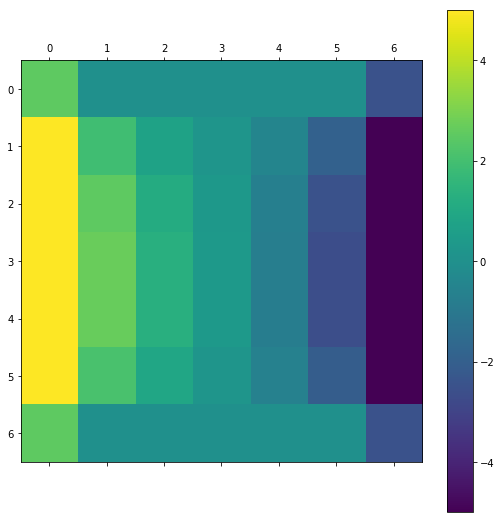

In [12]:
#Plot Voltage Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(V)
plt.colorbar()

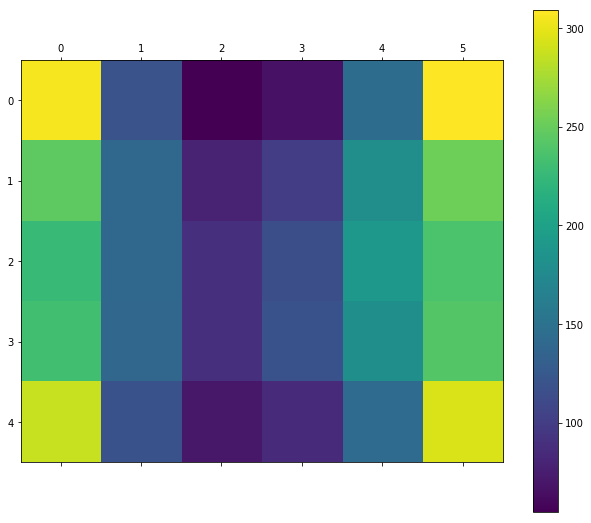

In [13]:
#Plot Field Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(E)
plt.colorbar()

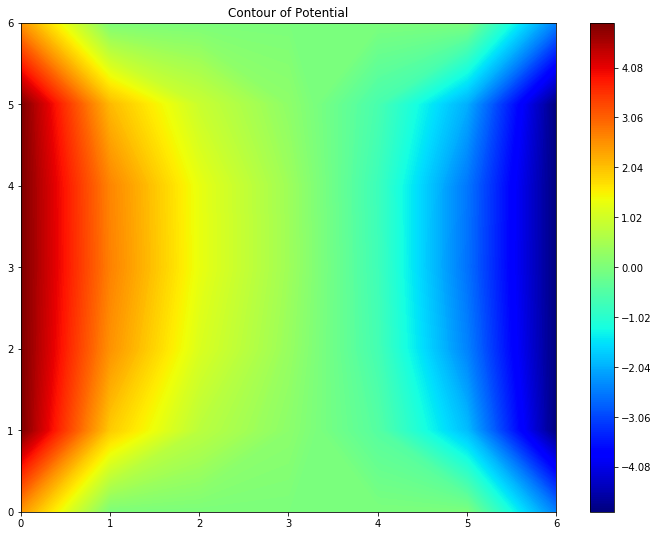

In [14]:
#Contour of Potential
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=lenY=7
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Potential")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()


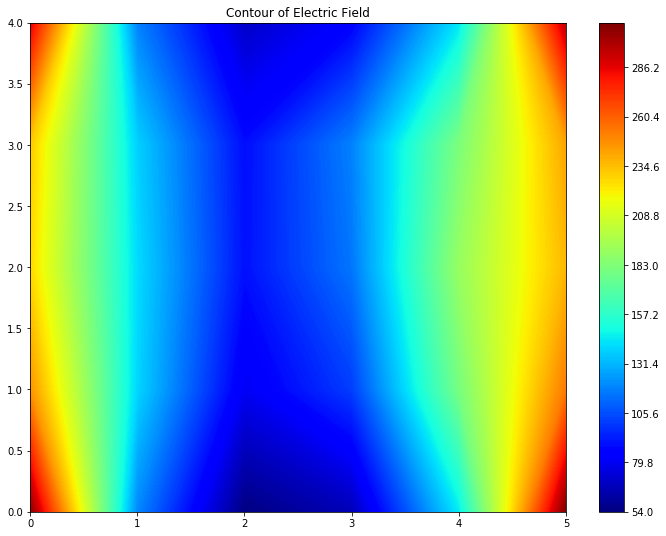

In [15]:
#Contour of Electric Field
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=6
lenY=5
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Electric Field")
plt.contourf(X, Y, E, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

In [16]:
pd.DataFrame(E).to_csv("ElectricFields.csv")
pd.DataFrame(V).to_csv("voltages.csv")